In [1]:
import pandas as pd

# Load the data
df = pd.read_csv('customer_value_analysis.csv')

# Display the first few rows of the dataframe
df.head()


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [2]:
# Display the information about the dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [3]:
# Describe the dataframe
df.describe(include='all')


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
count,9134,9134,9134.000000,9134,9134,9134,9134,9134,9134,9134.000000,...,9134.000000,9134.000000,9134.000000,9134,9134,9134,9134,9134.000000,9134,9134
unique,9134,5,NaN,2,3,5,59,5,2,NaN,...,NaN,NaN,NaN,3,9,4,4,NaN,6,3
top,BU79786,California,NaN,No,Basic,Bachelor,1/10/11,Employed,F,NaN,...,NaN,NaN,NaN,Personal Auto,Personal L3,Offer1,Agent,NaN,Four-Door Car,Medsize
freq,1,3150,NaN,7826,5568,2748,195,5698,4658,NaN,...,NaN,NaN,NaN,6788,3426,3752,3477,NaN,4621,6424
mean,NaN,NaN,8004.940475,NaN,NaN,NaN,NaN,NaN,NaN,37657.380009,...,48.064594,0.384388,2.966170,NaN,NaN,NaN,NaN,434.088794,NaN,NaN
std,NaN,NaN,6870.967608,NaN,NaN,NaN,NaN,NaN,NaN,30379.904734,...,27.905991,0.910384,2.390182,NaN,NaN,NaN,NaN,290.500092,NaN,NaN
min,NaN,NaN,1898.007675,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,0.099007,NaN,NaN
25%,NaN,NaN,3994.251794,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,24.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,272.258244,NaN,NaN
50%,NaN,NaN,5780.182197,NaN,NaN,NaN,NaN,NaN,NaN,33889.500000,...,48.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,383.945434,NaN,NaN
75%,NaN,NaN,8962.167041,NaN,NaN,NaN,NaN,NaN,NaN,62320.000000,...,71.000000,0.000000,4.000000,NaN,NaN,NaN,NaN,547.514839,NaN,NaN


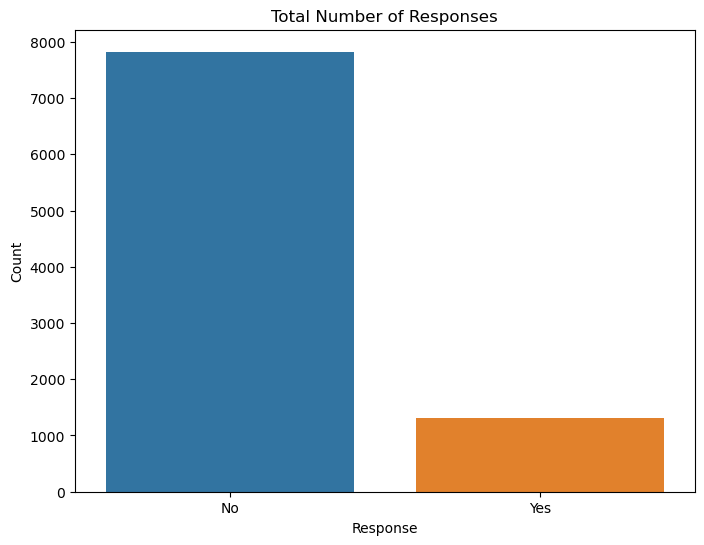

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the total number of responses
plt.figure(figsize=(8, 6))
sns.countplot(x='Response', data=df)
plt.title('Total Number of Responses')
plt.ylabel('Count')
plt.xlabel('Response')
plt.show()


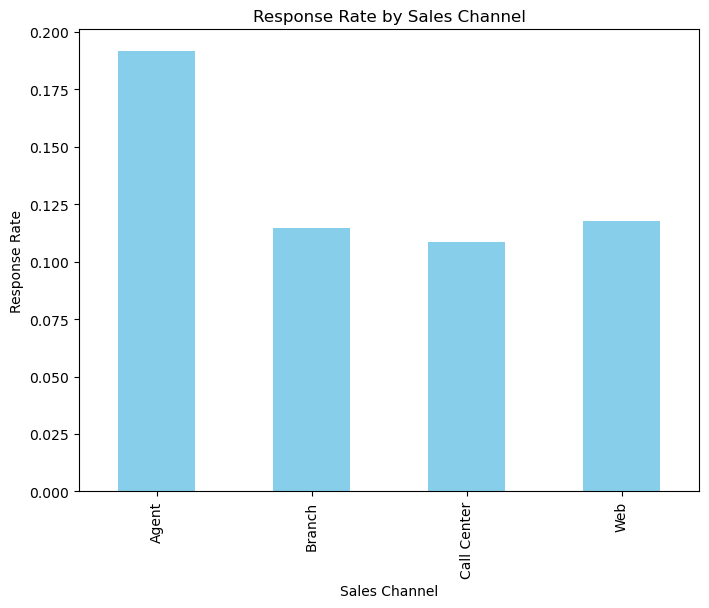

In [5]:
# Calculate the response rate by sales channel
response_rate_by_channel = df.groupby('Sales Channel')['Response'].apply(lambda x: (x == 'Yes').mean())

# Plot the response rate by sales channel
plt.figure(figsize=(8, 6))
response_rate_by_channel.plot(kind='bar', color='skyblue')
plt.title('Response Rate by Sales Channel')
plt.ylabel('Response Rate')
plt.xlabel('Sales Channel')
plt.show()


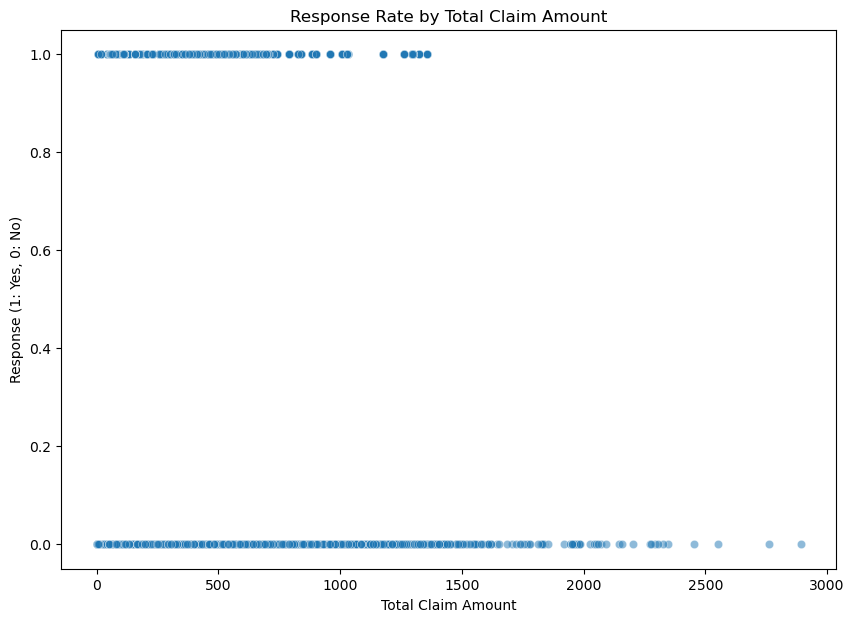

In [6]:
# Convert 'Response' column to numerical (1 for 'Yes' and 0 for 'No')
df['Response_numerical'] = df['Response'].map({'Yes': 1, 'No': 0})

# Plot the response rate by total claim amount
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Total Claim Amount', y='Response_numerical', data=df, alpha=0.5)
plt.title('Response Rate by Total Claim Amount')
plt.ylabel('Response (1: Yes, 0: No)')
plt.xlabel('Total Claim Amount')
plt.show()
